# Analytics snippet: Version control, because the Recycle Bin doesn't count

In [7]:
%load_ext hierarchymagic
import os

## What is version control and why should I bother?

Version control, also known as revision control or source control, is the management of changes to programs, files, documents and other collections of information.

As actuaries, our modelling techniques and analyses come in many forms and vary in size depending on the task at hand. For example, a simple exercise of analysing loss ratios for a given period and product could consist only of a small R script or SQL query. On the other hand, something like a functional reserving model could easily be a one gigabyte-sized excel workbook. 

You, the reader, probably already practice version control in one way or another in the course of your work/ studies. The most primitive and clunky (but useful) method would be the the "Save As" button, where another version of the working file is snapshot and the user is free to modify the currently opened document. Does this look familiar or remind you of your college submissions? <br>

INSERT IMAGE HERE

## GitHub Example

Let's demonstrate some version control practices for scripts with a simple but somewhat realistic example using one of the most popular platforms, GitHub. By the way, it is pronounced as _Geet-hub_, not _Jeet-hub_. <br>
To put things simply, Git is just an open source system designed to handle version control processes for both small and large scale projects. GitHub is just a hosting service for projects that use this "Git" tool. <br>
Imagine working on a task which requires your team to come up with a reasonable prediction function given some historical dataset. Unsurprisingly, a folder that encompasses the whole project might contain files such as:

- The required input data.csv
- A python script.py which runs the a model and produces the coefficients for prediction

Note that in most cases, models and tasks are usually a little more complex, which translates into a more complicated file structure with modularized scripts even. Nevertheless something simple such as the one we have will suffice in demonstrating a good use-case for version control.

In [5]:
os.listdir("./example_project")

['data.csv', 'model.py']

To start off, we want to go into the [GitHub website](https://github.com/) and create an account if you have not already.

In [20]:
%%html
<img src="img/github_homepage.png", width=600, height=600>

Signing up for an account in GitHub is free with a paid option. Besides being a version control tool, GitHub also serves as a platform for collaboration and project management for a variety of disciplines. <br>
After creating a free account, we can then start by creating our first repository or "repo" for short. As the name suggests, a repository is simply a place where you can store your documents and the user has a choice (as of January 2019) of making the its content public or private.

In [21]:
%%html
<img src="img/create_repo.png", width=600, height=600>

In [22]:
%%html
<img src="img/empty_repo.png", width=600, height=600>

We now have an empty (apart from the README.md) virtual storage which we can put our files into! There are generally 2 ways you could go about using the features available on GitHub, and these are the:
- Git CLI (Command-line interface)
- Github Desktop GUI (Graphic User Interface) <br>

In this article, we will try to avoid using the CLI (Although it is my preferred method) as it can be daunting for the users who are new to Git and the concept of a version control system. Just as an example, creating a repository using the Git CLI would require the user to install Git from [here](https://git-scm.com/downloads), and the steps shown above correspond to the following terminal/command prompt commands.


In [44]:
%%html
<img src="img/create_repo_cli.png", width=400, height=400>

Okay, enough of that scary stuff, let's go with option number 2, the GitHub Desktop GUI. It is basically an application which can be downloaded from [here](https://desktop.github.com/), and allows the user to interact and use the GitHub features without having to go onto your web browser every single time. Before we move on, let's take some time to go through the some commonly used terms and general mechanics of the Git system. <br><br>


#### Repository

As mentioned before, a repository is simply a location where the user can store all of his/ her files relating to a particular project. In the Git system, repositories can be grouped generally into 2 main cateogries:
- Local
- Remote

A local repository is just a file location residing in your local system. When you "commit" your code, a version/snapshot is created in your local repository. On the other hand, a remote repository generally lies somewhere outside your system, on an external server (GitHub in this case). This is very important when collaborating with multiple people as this is where everyone will be "uploading" their code to.

#### Commit

A commit, is just a set of changes to a file or files within a repository. Think of it as a local "Save As" function, but way cooler sounding and every time you save, it creates a hash that allows you to keep records of what changes were made when and by whom.

In [28]:
%%html 
<img src="img/commit_meme.jpg", width=200, height=200>
Image credits to Andy Grunwald on Twitter

#### Push/ Pull

Because commits are the "Save As" equivalents in your local system. Git requires something that communicates this "Save As" action to the remote repository over at GitHub. This "something" is called the push command. It makes your local commit official by changing the state of the remote repository as well. As you can probably guess, the pull command would then conversely copy the current state of the remote repository to your local repository.

#### Branch

A Git branch, can be somewhat seen as parallel universes for documents. When creating a new repository, a default "Master" branch is always created.
In my opinion, this is best explained with an example. Let's say we have 3 actuaries; Jimmy, Michelle and Esther working on a pricing model. The initial model uses a simple linear regression to predict the age curve for motor insurance policyholders, and is saved in a repository in the master branch. The 3 of them then start to improve the model by implementing what they think is the most reasonable:

- Jimmy thinks that SLR is fine but increases the intercept by a little to account for the age profile for the company's portfolio
- Michelle thinks that SLR is reasonable but insufficient, so proceeds to add 1 more independent variable to the model
- Esther totally disagrees with the use of SLR and replaces the whole script with a GLM model

In each of the scenarios, the actuaries would have changed the script according to what he/ she believes the model ought to be. However, they would not be changing the original script or "Master" branch but instead, would create a new branch (which is just a copy of master) and make their changes from there. Back to the parellel universe analogy, in one of the parellel universes the script remained a SLR with a tweaked intercept, but in another the script would have been a GLM!

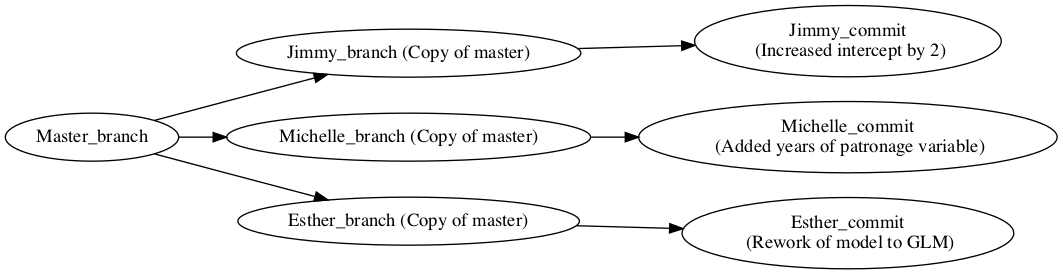

In [30]:
%%dot
digraph {
        rankdir = LR
        Master_branch -> "Jimmy_branch (Copy of master)"-> "Jimmy_commit\n (Increased intercept by 2)"
        Master_branch -> "Michelle_branch (Copy of master)" -> "Michelle_commit\n (Added years of patronage variable)"
        Master_branch -> "Esther_branch (Copy of master)" -> "Esther_commit\n (Rework of model to GLM)"
        }

So how does Git decide what is the official/ latest version of the model in the remote repository?

#### Merges and Conflicts

As you can probably tell, merging is somewhat the opposite of branching and is the act of combining branches back into the master branch. As you can also probably tell, the act of splitting the master into different branch is alot less troublesome than merging branches back into master when dealing with multiple changes from different collaborators. Git does not decide on whose commit is right and whose is wrong. In fact, the system relies on the team to come to an agreement and to manually resolve these conflicts by choosing which parts of the code in each branch to keep and to delete.

#### Git Workflow

Now that we have gone through some of the main components of the Git system. Let's take a look at the general workflow of any project that relies on Git.

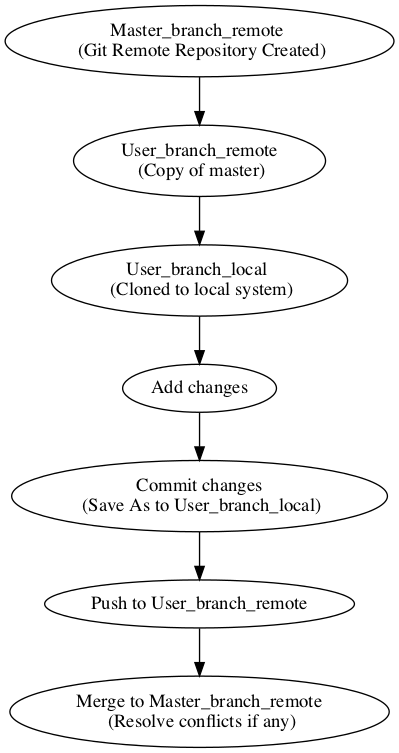

In [40]:
%%dot
digraph {
        rankdir = UD
        "Master_branch_remote \n (Git Remote Repository Created)" -> "User_branch_remote\n (Copy of master)"
        "User_branch_remote\n (Copy of master)" -> "User_branch_local \n (Cloned to local system)" -> "Add changes" -> "Commit changes\n (Save As to User_branch_local)" -> "Push to User_branch_remote"
        "Push to User_branch_remote" -> "Merge to Master_branch_remote\n (Resolve conflicts if any)"
        }

Keeping all these in mind, let's continue on with our example and open up the GitHub desktop application, which would open a page that looks something like this.

In [32]:
%%html
<img src="img/github_desktop_home.png", width=400, height=400>

Remember, we created a remote repository before on the GitHub website, but we will need a file in our local machine which we can use to sync our documents (The local repository). Think of it as dropping some files into a local DropBox or GoogleDrive folder to sync them into your online storage. If we then proceed to click on the "Repository" tab in the top left corner, we will see an "add" option.

In [43]:
%%html
<img src="img/clone_repo.png", width=400, height=400>

Select "Clone repository" to make a copy of the remote on your local system

In [35]:
%%html
<img src="img/clone_repo_2.png", width=400, height=400>

Here, you can just copy the url of your repository (either from the address bar at the top of the web page or the green "clone or download" button) into the first field. In the local path, you are to choose an empty folder which will become your new "local version" of the GitHub storage, and any changes made there can be synced to the online repository when you push your code.

In [36]:
%%html
<img src="img/local_repo.png", width=400, height=400>

After cloning a local version of the repository, it is finally time to sync our project files. We can do this by simple adding some files into the local path. Let's add our 2 files from the example project:
- data.csv
- model.py

Into the local repository and see what happens.

In [37]:
%%html
<img src="img/git_status_local.png", width=400, height=400>

We can see that the GitHub application automatically detected the changes within the folder! (which is the addition of 2 new files in this case). After checking through to make sure that those are indeed the files that we want to sync, we simply type a summary and description of the update on the bottom left of the window, and hit the "commit to master" button. (There are a set of industry best practices with regards to the format of commit messages and descriptions but we will not go into that in this article) <br>

After committing our the changes/ additions, we just need to hit the "push to origin" button and just like that, our files will be synced to the online repository. Let's go back to the GitHub website to make sure that the files were indeed synced up.

In [38]:
%%html
<img src="img/github_synced.png", width=400, height=400>

If we make adjustments to any of the files in our local folder down the road, the GitHub application will pick up these changes in the same way shown above and we would just go through the same steps to sync our files online by committing and pushing the changes. So, you might be asking, where does the version control aspect of this tool come in? <br>

If you take a closer look at the screenshot above, you would notice "2 commits" label on the top left. If we were to click on that, it would bring us to the screen below, where we can see all previous commits made to the repository.

In [4]:
%%html
<img src="img/github_commit_history.png", width=400, height=400>

When clicking on these previous commits, it returns the user to previous states of the repository at those times, allowing him/ her to:
- Review the changes that have been made at that point of time
- Download any older versions of files if required
- Revert the repository back to any of the previous states if required <br>

If you can't already tell, this is an extremely useful feature for anyone or any team working collaboratively on a project!

## Other tools available

As mentioned, besides using the GitHub GUI application, the Git CLI is another popular way to go through the Git process. Also, many IDEs like Atom (By GitHub) and VSCode will have downloadable plugins or have Git functionalities built into them, which makes the whole process a lot more seamless when trying to integrate it into your workflow.

## Limitations of GitHub

If you have not already realised, all of the examples shown so far have used scripts of code, which usually isn't memory intensive. Actuaries however, deal with huge spreadsheets alot of the time and the limit per file in any given upload is 100MB. Unfortunately, GitHub is primarly for code and thus would not support the bigger documents such as spreadsheet models and datasets. Some suggestions include:

#### Excel Spreadsheets
- Creating a "Changelog" sheet to record details of the user and the changes made if past versions are not required
- Using the good old "Save As" function to back up older versions of the spreadsheet when changes are made
- Using xltrail (Paid solution) which uses the same Git system
#### Datasets
- Using the good old "Save As" function to back up older versions (Prefably using a cloud hosting service like Azure or Snowflake)
- OrpheusDB

## Conclusion

I believe that, beneath all the data hype, actuaries are the data scientists for the insurance industry and contrary to popular beliefs, the datascience and analytics pipeline is more than just fancy machine learning algorithms. If you can recall from your Part 2 exams, documentation is an extremely important part of the actuarial control cycle and as our models become more complex (Too complex for excel to handle efficiently), our "housekeeping" and documentation processes must evolve alongside them.